In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
result1 = np.zeros((900,300))
i = 0

In [3]:
months = [f"{x:02d}" for x in range(7,10)]
years = [f"{x:04d}" for x in range(21,321)]
i =0
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.PD.nc')
        plotvar = data.variables['PD'][0,:,:]
        plotvar[plotvar == -1.0] = np.nan
        lont = data.variables['TLONG']
        latt = data.variables['TLAT']
        lont = lont[271:365,600:900]
        latt = latt[271:365,600:900]
        plot1 = plotvar[49:,271:365,600:900]
        plot1 = np.nanmean(plot1, axis = 0)
        aveplot = np.nanmean(plot1,axis=0)
        result1[i,:] = aveplot[:]
        i = i + 1

In [4]:
A = np.arange(900)
B = np.arange(300)
xx, yy = np.meshgrid(B, A)

In [52]:
        # Pick some of the nicer colors from the palette...
nice_cmap=plt.get_cmap('jet')
lev_cmap = nice_cmap([10,20,30,40,50,60,70,80,90,100,110,120,140,150,160,170,180,190,200,240])
new_cmap = cols.ListedColormap(lev_cmap,"jet")
#nice_levels = [27.4,27.62,27.68,27.71,27.74,27.75,27.76,27.77,27.78]
nice_levels = [27.785,27.786,27.787,27.788,27.789,27.800,27.801,27.802,27.803,27.804,27.805,27.806,27.807,27.808,27.809,27.81]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************

In [53]:
result = (result1 -1)*1000

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: The following kwargs were not used by contour: 'spacing'
  """


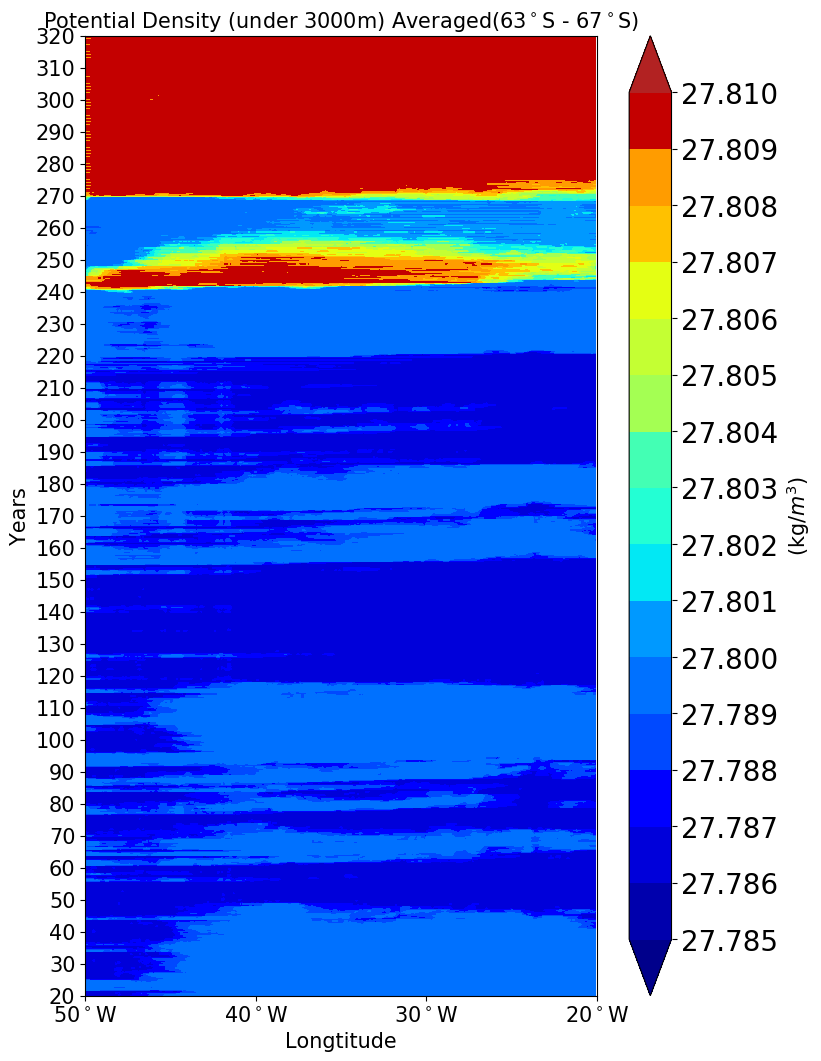

In [56]:
# plot the result
fig = plt.figure(figsize=(8, 12),dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
my_font = {'fontname':'Cambria', 'size':'15'}
im = ax0.contourf(xx, yy, result,cmap = new_cmap,norm =norm,spacing = 'uniform',levels = nice_levels,extend='both')
im.cmap.set_over('firebrick')
im.cmap.set_under('darkblue')
#plt.vlines(530, 0, 119, colors = "y",linestyles = "dashed")
#plt.vlines(530, 0, 159, colors = "y",linestyles = "dashed")
#CS = ax0.contour(xx[:,430],yy[:,430],colors = 'r')
cbar = fig.colorbar(im, ax=ax0, ticks=nice_levels,extendfrac='auto')
cbar.ax.tick_params(labelsize=20)
cbar.set_label('(kg/$m^3$)', **my_font)
#plt.clabel(CS, inline=0.1, fontsize=10)

#############################################################################
##设定X坐标值
plt.xticks(range(0,301,100), ['50$^\circ$W','40$^\circ$W','30$^\circ$W', '20$^\circ$W', '10$^\circ$W', '0$^\circ$W'],**my_font)
plt.yticks(range(0,901,30), ['20', '30','40', '50','60','70', '80','90', '100','110','120','130','140','150','160','170',\
                             '180','190','200', '210','220','230', '240','250', '260','270','280','290','300','310','320','330'],**my_font)
plt.xlabel('Longtitude',**my_font)
plt.ylabel('Years',**my_font)
ax0.set_title('Potential Density (under 3000m) Averaged(63$^\circ$S - 67$^\circ$S)',**my_font)
plt.savefig("salt408m.png")